In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import cv2

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
X_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [ ]:
#y_train = y_train.reshape(-1,) - don't need to reshape b/c it's already 1D
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]

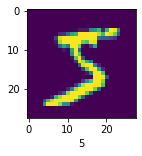

In [ ]:
#0 is checking the 1st image
plot_sample(X_train,y_train,0)

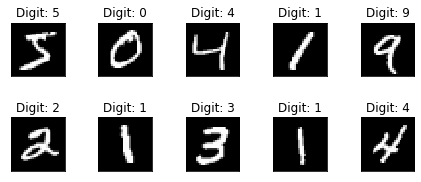

In [ ]:
for i in classes: #range (10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i],cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks ([ ])
  plt.yticks([])

In [ ]:
"""
near to white it will be 255
if it's near to black it will be 0
175, 26, 166 are gray color
0s will be black
"""
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

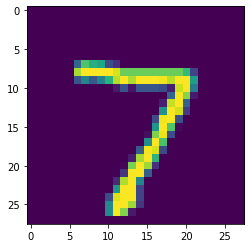

In [ ]:
plt.imshow(X_test[0])

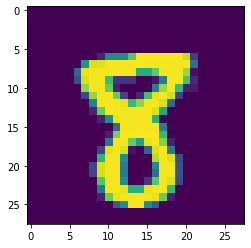

In [ ]:
plt.imshow(X_test[128])

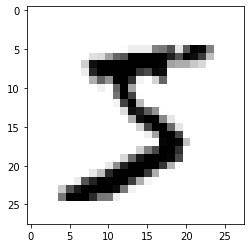

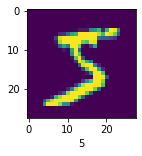

In [ ]:
"""
pre-processing
normalize data
want to divide each pixel value by 255
pixel values range from 0 to 255 for each of the channels rg and b
you will be normalizing it into a 0 to 1 range
max value for pixles is 255
"""
X_train = X_train/255
X_test = X_test/255
plt.imshow(X_train[0], cmap=plt.cm.binary)
plot_sample(X_train,y_train,0)#0 is checking the 1st image

In [ ]:
#values are between 0 and 1
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
y_train[0]

5

In [ ]:
#resize image
#increasing it 1 size for convolutional operation so we need 1 extra dimension
#-1 is for 60000, 
img_size = 28
X_train = np.array(X_train).reshape(-1, img_size, img_size,1)
X_test = np.array(X_test).reshape(-1, img_size, img_size,1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()
#1st convolutional alyer      (60000,28,28,1)  28-3+1 = 26 x 26
model.add(Conv2D(64,(3,3), input_shape=X_train.shape[1:])) #shape[:1] - we only need 28,28,1 so skip 60000
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
                    
#2nd convolutional layer.  26-3+1 = 24 x 24
model.add(Conv2D(64,(3,3), input_shape=X_train.shape[1:])) #number of kernals or filters 64, each filter has 3, 3 kernals. 1 layer having 64 filters
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) #single maximum value of 2 x 2 matrix, rest it will remove
#3rd convolutional alyer
model.add(Conv2D(64,(3,3), input_shape=X_train.shape[1:])) #number of kernals or filters 64, each filter has 3, 3 kernals. 1 layer having 64 filters
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
#fully connected layer #1
model.add(Flatten()) #2D to 1D
model.add(Dense(64)) #64 neurons and they are all connected
model.add(Activation('relu'))

#fully connected layer #2
model.add(Dense(32)) #32 neurons and they are all connected
model.add(Activation('relu'))

#last fully connected layer, output must be equal to # of classes, 10
model.add(Dense(10)) #last dense layer must be equal to 10
model.add(Activation('softmax'))#gives class probabilties


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_52 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_53 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #trying to minimize loss

In [ ]:
"""
train model
for validation set it is checking itself
accuracy and validation accuracy should be in range.  If 30 < accuracy 98, then overfitting consider dropout layer
"""
h1 = model.fit(X_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 61s 46ms/step - loss: 0.2738 - accuracy: 0.9138 - val_loss: 0.0936 - val_accuracy: 0.9698
Epoch 2/5
1313/1313 [==============================] - 61s 47ms/step - loss: 0.0866 - accuracy: 0.9729 - val_loss: 0.0840 - val_accuracy: 0.9735
Epoch 3/5
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0654 - accuracy: 0.9799 - val_loss: 0.0679 - val_accuracy: 0.9799
Epoch 4/5
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.0590 - val_accuracy: 0.9829
Epoch 5/5
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0759 - val_accuracy: 0.9786


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0781 - accuracy: 0.9803


[0.07807660847902298, 0.9803000092506409]

Text(0.5, 0, 'Epochs')

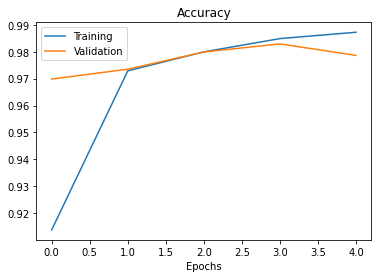

In [ ]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [ ]:
predictions = model.predict([X_test])

In [ ]:
#we have class probabilty distributions

predictions

array([[5.14480325e-09, 3.16890396e-06, 2.37091285e-06, ...,
        9.99983549e-01, 9.92069360e-08, 9.47384433e-06],
       [3.38798527e-05, 1.03624887e-04, 9.99770343e-01, ...,
        9.62755530e-06, 1.13749127e-06, 4.39548472e-07],
       [1.18666739e-08, 9.99972224e-01, 3.58243781e-08, ...,
        1.43077950e-05, 3.16539435e-08, 1.39017914e-07],
       ...,
       [1.62401082e-11, 1.86606730e-09, 9.27959098e-10, ...,
        1.44057815e-08, 7.66595008e-07, 8.08336242e-09],
       [1.08322781e-03, 3.93332084e-05, 2.18513355e-06, ...,
        2.29643658e-04, 2.96118949e-02, 1.72345055e-04],
       [1.08856375e-06, 1.12123928e-06, 3.62347627e-08, ...,
        3.62602918e-07, 7.14492501e-08, 1.95902974e-08]], dtype=float32)

In [ ]:
"""
convert predictions from 1 hot encoding. use numpy
prediction is that it's a 7
"""
print(np.argmax(predictions[128]))

8


In [ ]:
model = Sequential()
#1st convolutional alyer      (60000,28,28,1)  28-3+1 = 26 x 26
model.add(Conv2D(64,(3,3), input_shape=X_train.shape[1:])) #number of kernals or filters 64, each filter has 3, 3 kernals. 1 layer having 64 filters
model.add(Activation('relu')) #to make non-linear, all values less than 0 it will drop values, all values greter than 0 will allow to move ot next layer
model.add(MaxPooling2D(pool_size=(2,2))) #single maximum value of 2 x 2 matrix, rest it will remove
                    
#2nd convolutional layer.  26-3+1 = 24 x 24
model.add(Conv2D(64,(3,3), input_shape=X_train.shape[1:])) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 

#fully connected layer #1
model.add(Flatten()) #2D to 1D. convolution is 2D and dense wants 1D
model.add(Dense(64)) #64 neurons and they are all connected
model.add(Activation('relu'))
#output layer
#last fully connected layer, output must be equal to # of classes, 10
model.add(Dense(10)) #last dense layer must be equal to 10
model.add(Activation('softmax'))#gives class probabilties


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_58 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_59 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #trying to minimize loss

In [ ]:
#validation split is 30%
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 60s 45ms/step - loss: 0.1734 - accuracy: 0.9467 - val_loss: 0.0815 - val_accuracy: 0.9741
Epoch 2/5
1313/1313 [==============================] - 59s 45ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0597 - val_accuracy: 0.9813
Epoch 3/5
1313/1313 [==============================] - 59s 45ms/step - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.0475 - val_accuracy: 0.9861
Epoch 4/5
1313/1313 [==============================] - 58s 44ms/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.0436 - val_accuracy: 0.9860
Epoch 5/5
1313/1313 [==============================] - 59s 45ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0458 - val_accuracy: 0.9872
